In [2]:
import pandas as pd

# Load the dataset (replace with your actual file path if necessary)
data = pd.read_excel("Online Retail.xlsx", sheet_name=0, nrows = 1000)

# Display the first few rows to understand the structure of the dataset
print("First few rows of the dataset:")
print(data.head())

# Display general information about the dataset
print("\nData Info:")
print(data.info())

# Display basic statistical summary of numerical columns
print("\nStatistical Summary:")
print(data.describe())


First few rows of the dataset:
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  

In [3]:
# Overview of the dataset structure
# Checking unique values in categorical columns
print("\nUnique Counts of Categorical Columns:")
for col in ['InvoiceNo', 'StockCode', 'Description', 'Country']:
    print(f"{col}: {data[col].nunique()} unique values")

# Check data types of each column
print("\nData Types and Null Values:")
print(data.dtypes)
print("\nMissing Values in Each Column:")
print(data.isnull().sum())



Unique Counts of Categorical Columns:
InvoiceNo: 66 unique values
StockCode: 590 unique values
Description: 591 unique values
Country: 4 unique values

Data Types and Null Values:
InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

Missing Values in Each Column:
InvoiceNo      0
StockCode      0
Description    1
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     1
Country        0
dtype: int64


In [4]:
# Check columns with missing values
print("\nColumns with Missing Values:")
missing_values = data.isnull().sum()
print(missing_values[missing_values > 0])

# Drop rows with missing values in 'CustomerID' and 'Description' columns for cleaning purposes
data_cleaned = data.dropna(subset=['CustomerID', 'Description'])
print(f"\nShape of Data After Dropping Missing Values: {data_cleaned.shape}")



Columns with Missing Values:
Description    1
CustomerID     1
dtype: int64

Shape of Data After Dropping Missing Values: (999, 8)


In [5]:
# Check for duplicates in the dataset
duplicates_count = data_cleaned.duplicated().sum()
print(f"\nNumber of Duplicate Rows Before Removal: {duplicates_count}")

# Remove duplicate rows
data_cleaned = data_cleaned.drop_duplicates()
print(f"Shape of Data After Dropping Duplicates: {data_cleaned.shape}")



Number of Duplicate Rows Before Removal: 23
Shape of Data After Dropping Duplicates: (976, 8)


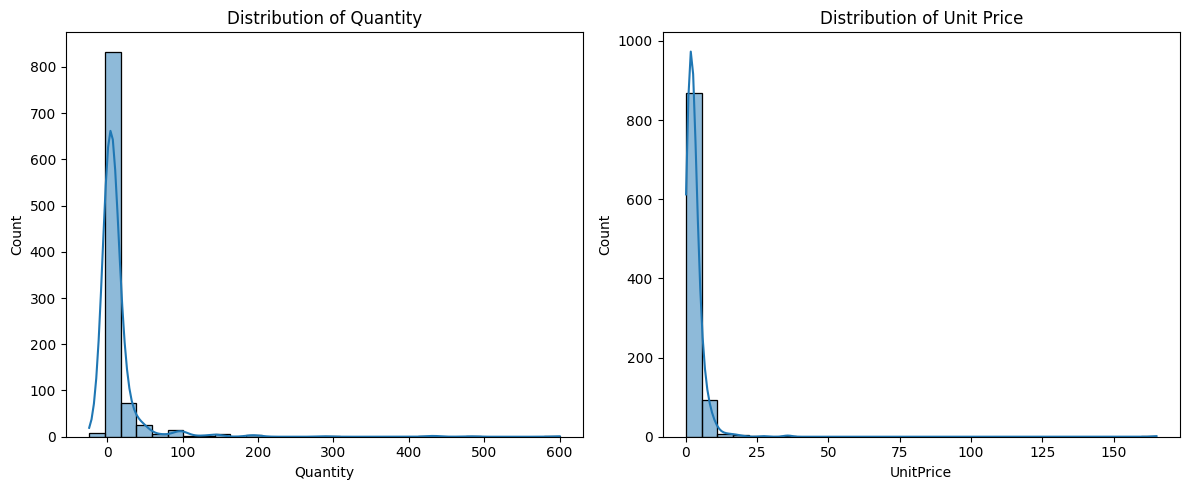

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of Quantity
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(data_cleaned['Quantity'], bins=30, kde=True)
plt.title("Distribution of Quantity")

# Distribution of Unit Price
plt.subplot(1, 2, 2)
sns.histplot(data_cleaned['UnitPrice'], bins=30, kde=True)
plt.title("Distribution of Unit Price")

plt.tight_layout()
plt.show()


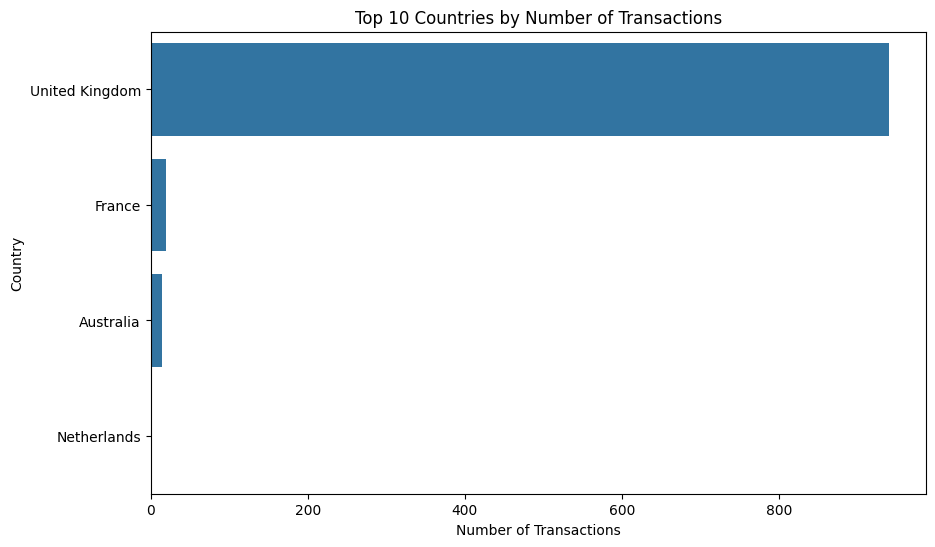

In [7]:
# Transactions per Country - Top 10
plt.figure(figsize=(10, 6))
country_counts = data_cleaned['Country'].value_counts().head(10)
sns.barplot(x=country_counts.values, y=country_counts.index)
plt.title("Top 10 Countries by Number of Transactions")
plt.xlabel("Number of Transactions")
plt.show()


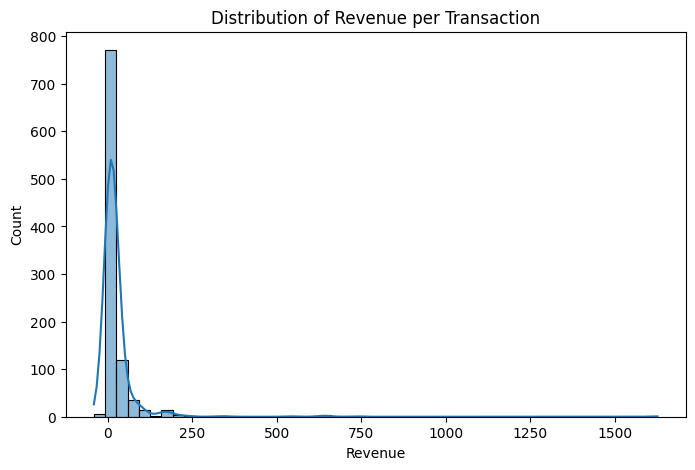

In [8]:
# Create a Revenue column
data_cleaned['Revenue'] = data_cleaned['Quantity'] * data_cleaned['UnitPrice']

# Plotting revenue distribution
plt.figure(figsize=(8, 5))
sns.histplot(data_cleaned['Revenue'], bins=50, kde=True)
plt.title("Distribution of Revenue per Transaction")
plt.xlabel("Revenue")
plt.show()
